## Partie 1

In [491]:
# Importation of the packages 

import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt
import scipy.stats

In [388]:
# Function to import datas

def import_data(Tickers,startinput,endinput):
    df=pd.DataFrame()
    for t in Tickers:
        df[t]=web.DataReader(name = t, data_source='yahoo', start=startinput, end=endinput)['Close']
    return(df)

In [389]:
# Create our portfolio of equities
Tickers = ['DPW.DE','ALV.DE','BMW.DE','BAS.DE','FME.DE'] 

# Define period
startinput="2017-1-1"
endinput="2017-12-31"

# Import data from YAHOO 
Price = import_data(Tickers,startinput,endinput)

In [390]:
#Price.head()

In [391]:
# Calcul of daily returns
Return_d1=pd.DataFrame()
for t in Tickers:
    Return_d1[t]=Price[t]/Price[t].shift(1)-1
Return_d1=Return_d1[1:]

In [392]:
# Set the investment weights
weights = np.array([.2, .2, .2, .2,.2])

#Compute Portfolio daily returns 
Ptf_Return_d1 = Return_d1.dot(weights)

In [393]:
#Ptf_Return.head()

### Graphique and BJ test

In [445]:
def graph(df):
    # Compute normal curve parameters
    meanR = np.mean(df)
    sdevR = np.std(df)
    
    # Prepare graph
    minR  = np.min(df)
    maxR  = np.max(df)
    x     = np.linspace(minR, maxR, 100)
    
    # Graph
    plt.hist(df,edgecolor = 'black', bins =10) 
    plt.plot(x, scipy.stats.norm.pdf(x,meanR,sdevR)) 
    plt.grid(True)
    plt.xlabel('Range Daily Returns') 
    plt.ylabel('Number of observations')
    plt.show()

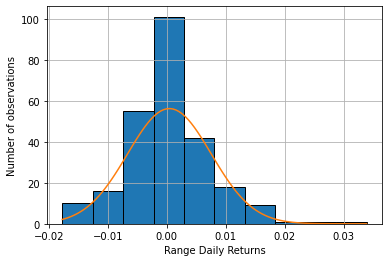

In [446]:
graph(Ptf_Return_d1)

In [396]:
from scipy import stats
jarque_bera_test = stats.jarque_bera(Ptf_Return_d1)
jarque_bera_test.statistic,jarque_bera_test.pvalue

print('The value of the statistic of bera jarque is',round(jarque_bera_test.statistic,3))
print('The p_value for the bera jarque test is',jarque_bera_test.pvalue)
print('Conlusion : We reject the nul hypotesis : The datas are normally distributed')

The value of the statistic of bera jarque is 78.212
The p_value for the bera jarque test is 0.0
Conlusion : We reject the nul hypotesis : The datas are normally distributed


### Mean & Standard deviation

In [397]:
mean_asset = pd.DataFrame() 
for t in Tickers :
    mean_asset.loc[1,t] = np.mean(Return_d1[t])
mean = float(mean_asset.dot(weights))

print('The mean of the datas is',mean)

The mean of the datas is 0.0004362802603118108


In [398]:
matrix_cov = R.cov()
var = float(np.transpose(weights).dot(matrix_cov.dot(weights)))
print('The standard deviation of the datas is',var)

The standard deviation of the datas is 5.058934432648611e-05


### Value at risk of 99%

In [400]:
# Calculate the quantile to fin the VaR99%
from scipy.stats import norm

x =np.sort(Ptf_Return_d1)
var_99 = np.quantile(x,1/100)

print('The VaR99% is',round(var_99,3)*100,'%')

The VaR99% is -1.6 %


## Partie 2 : Bootstrap method
<p> We take again the value of the first part until the daily portofolio return : Ptf_Return_d1 </p> 

In [437]:
#data from first part
Ptf_Return_d1 

Date
2017-01-03    0.000845
2017-01-04   -0.001411
2017-01-05    0.002480
2017-01-06    0.000502
2017-01-09   -0.017399
                ...   
2017-12-21    0.003757
2017-12-22   -0.001288
2017-12-27   -0.000670
2017-12-28   -0.005719
2017-12-29   -0.007568
Length: 254, dtype: float64

In [442]:
# Creation of bootstrap_simulation
def bootstrap_resample(X,n):  
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

In [477]:
# Function that returns a 10-day return considering a subsample of 10-observations
# We could have generalized this function to a d-day return
def return_ten(list):
    res = 1
    for daily_r in list:
        res = res * (daily_r+1)
    return(res-1)

# Function that returns x-observations of 10-days returns using bootstrap simulation
def x_return(x):
    df = pd.DataFrame()
    for i in range(x):
        List = bootstrap_resample(Ptf_Return,10)
        df = df.append({'returns': return_ten(List)}, ignore_index=True)
    return(df)

In [486]:
# Application with our datas
# Ptf_Return_d10 is the portofolio with n observations of 10 days return
n = 100000
Ptf_Return_boot = x_return(n)

# There is some NaN values (idk why) so we delete them
Ptf_Return_boot= Ptf_Return_boot.dropna()

### Value at risk of 99%

In [490]:
Ptf_Return_boot=Ptf_Return_boot.dropna()
x =np.sort(Ptf_Return_boot)
var_boot = np.quantile(x,1/100)

print('The VaR99% for the boostrap simulation is',round(var_boot,4)*100,'%')

The VaR99% for the boostrap simulation is -4.46 %
